# Gaussian Mixture Models (GMM)

### Основные концепции:

1. **Компоненты смеси:**
   - GMM представляет собой смесь K гауссовских распределений (компонентов).
   - Каждый компонент описывается своими параметрами: средним, ковариационной матрицей и весом.

2. **Вероятностная модель:**
   - Для каждого наблюдения существует вероятность принадлежности к каждой из компонентов.
   - Общая вероятность наблюдения раскладывается в сумму вероятностей отнесения к каждому компоненту.

3. **Обучение модели:**
   - Процесс обучения GMM включает в себя оценку параметров (среднего, ковариационной матрицы и веса) каждой компоненты смеси.
   - Это может быть выполнено с использованием EM-алгоритма (Expectation-Maximization).

Алгоритм работы Gaussian Mixture Models (GMM) базируется на EM-алгоритме (Expectation-Maximization), который используется для максимизации правдоподобия (likelihood) в статистических моделях. В случае GMM, EM-алгоритм применяется для оценки параметров каждой компоненты смеси.

Вот общий алгоритм работы GMM:

1. **Инициализация:**
   - Начнем с инициализации параметров для каждой компоненты смеси.
   - Можно использовать случайные значения для средних, ковариационных матриц и весов.

2. **E-шаг (Expectation):**
   - Для каждого наблюдения вычислите вероятности принадлежности к каждой компоненте смеси, используя текущие параметры.
   - Это делается с использованием формулы условной вероятности через правило Байеса.

3. **M-шаг (Maximization):**
   - Обновите параметры каждой компоненты смеси, используя полученные в E-шаге вероятности и наблюдения.
     - Обновление среднего: взвешенное среднее всех точек с весами, вычисленными в E-шаге.
     - Обновление ковариационной матрицы: взвешенная ковариационная матрица с весами, вычисленными в E-шаге.
     - Обновление весов: средний вес компоненты смеси в соответствии с вероятностями из E-шага.

4. **Повторение E и M шагов:**
   - Повторяйте E и M шаги до сходимости или достижения определенного числа итераций.

5. **Оценка правдоподобия:**
   - На каждом шаге проверяйте изменение правдоподобия модели.
   - Если оно стабилизируется, алгоритм считается сходившимся.

6. **Выбор оптимального количества компонентов:**
   - Часто применяется метод оценки информационного критерия, такого как AIC (Akaike Information Criterion) или BIC (Bayesian Information Criterion), для выбора оптимального количества компонентов.

Алгоритм GMM позволяет моделировать сложные структуры данных, так как каждая компонента может представлять различные группы в данных, и они могут иметь разные формы и ориентации. Однако важно помнить, что правильная инициализация параметров и выбор оптимального числа компонентов существенны для успешной кластеризации.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [34]:
df = pd.read_csv("Datasets/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [36]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [37]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
df.drop(['CustomerID'], inplace=True, axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [39]:
def trf_gender(x):
    if x == 'Male':
        return 0
    if x == 'Female':
        return 1


df["Gender_Transformed"] = df["Gender"].map(lambda x: trf_gender(x))

In [40]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Transformed
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [41]:
df.Gender_Transformed.unique()

array([0, 1], dtype=int64)

In [42]:
print(df['Gender'].unique())

['Male' 'Female']


In [43]:
#Select numeric column heads
columns = list(df.select_dtypes(include=['float64', 'int64']).columns.values)
columns

['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Transformed']

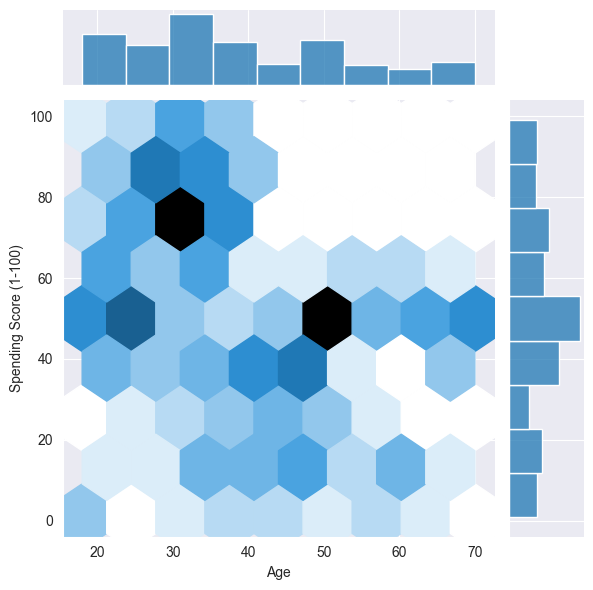

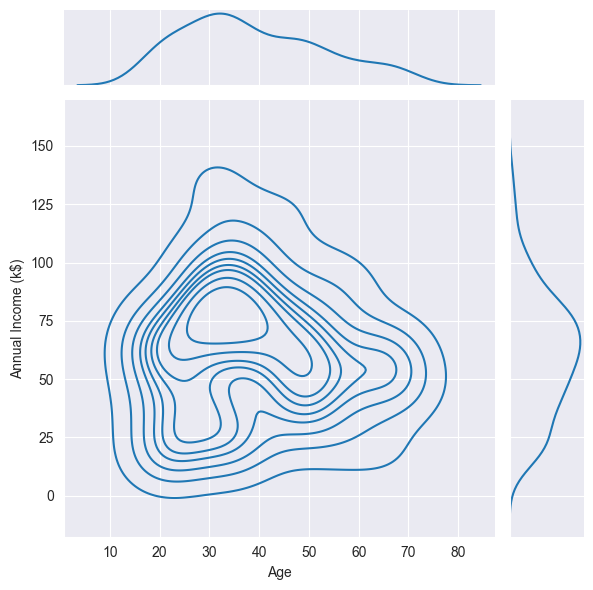

In [44]:
sns.jointplot(x='Age', y='Spending Score (1-100)', kind="hex", data=df)
sns.jointplot(x='Age', y='Annual Income (k$)', kind="kde", data=df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8972\3752329252.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', palette="coolwarm", data=df)


<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

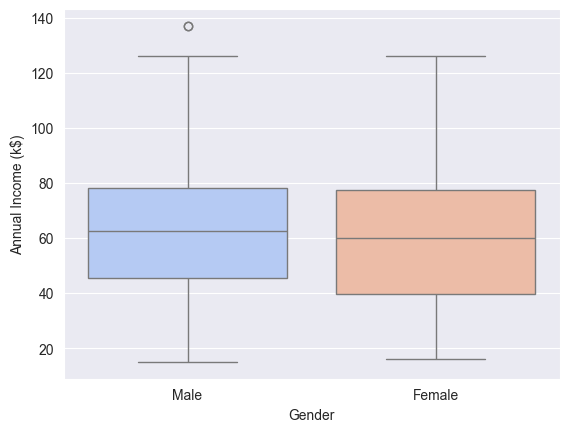

In [45]:
sns.boxplot(x='Gender', y='Annual Income (k$)', palette="coolwarm", data=df)

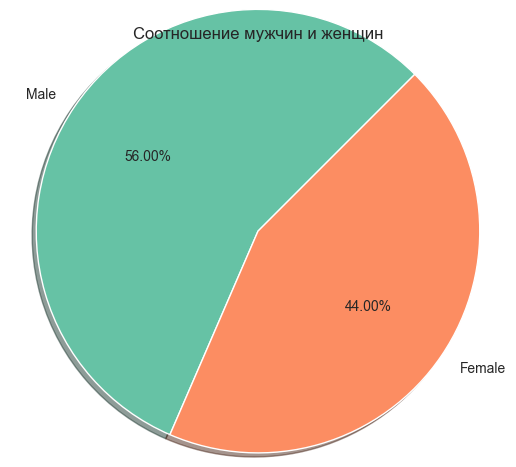

In [46]:
df.Gender.value_counts()
totalgender = df.Gender.value_counts()
genderlabel = ['Male', 'Female']
plt.axis('equal')
plt.pie(totalgender, labels=genderlabel, radius=1.5, autopct='%0.2f%%', shadow=True, explode=[0, 0], startangle=45,
        colors=sns.color_palette("Set2", n_colors=len(totalgender)))
plt.title('Соотношение мужчин и женщин')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8972\921519223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Age", data=df, palette="pastel")


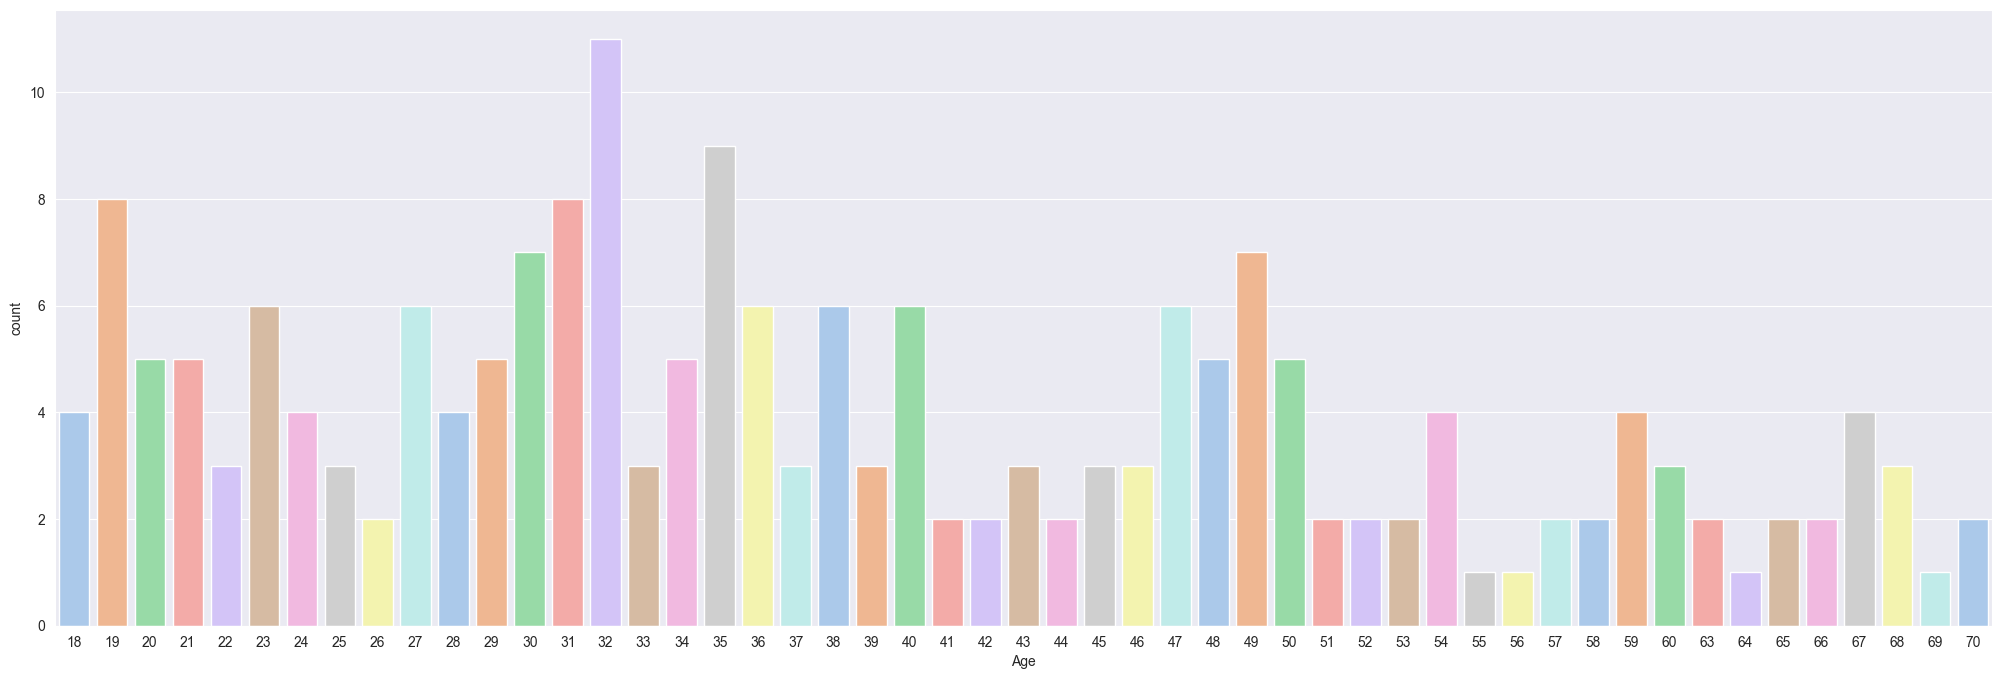

In [47]:
plt.figure(figsize=(25, 8))
sns.countplot(x="Age", data=df, palette="pastel")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8972\3862032922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Annual Income (k$)", data=df, palette="pastel")


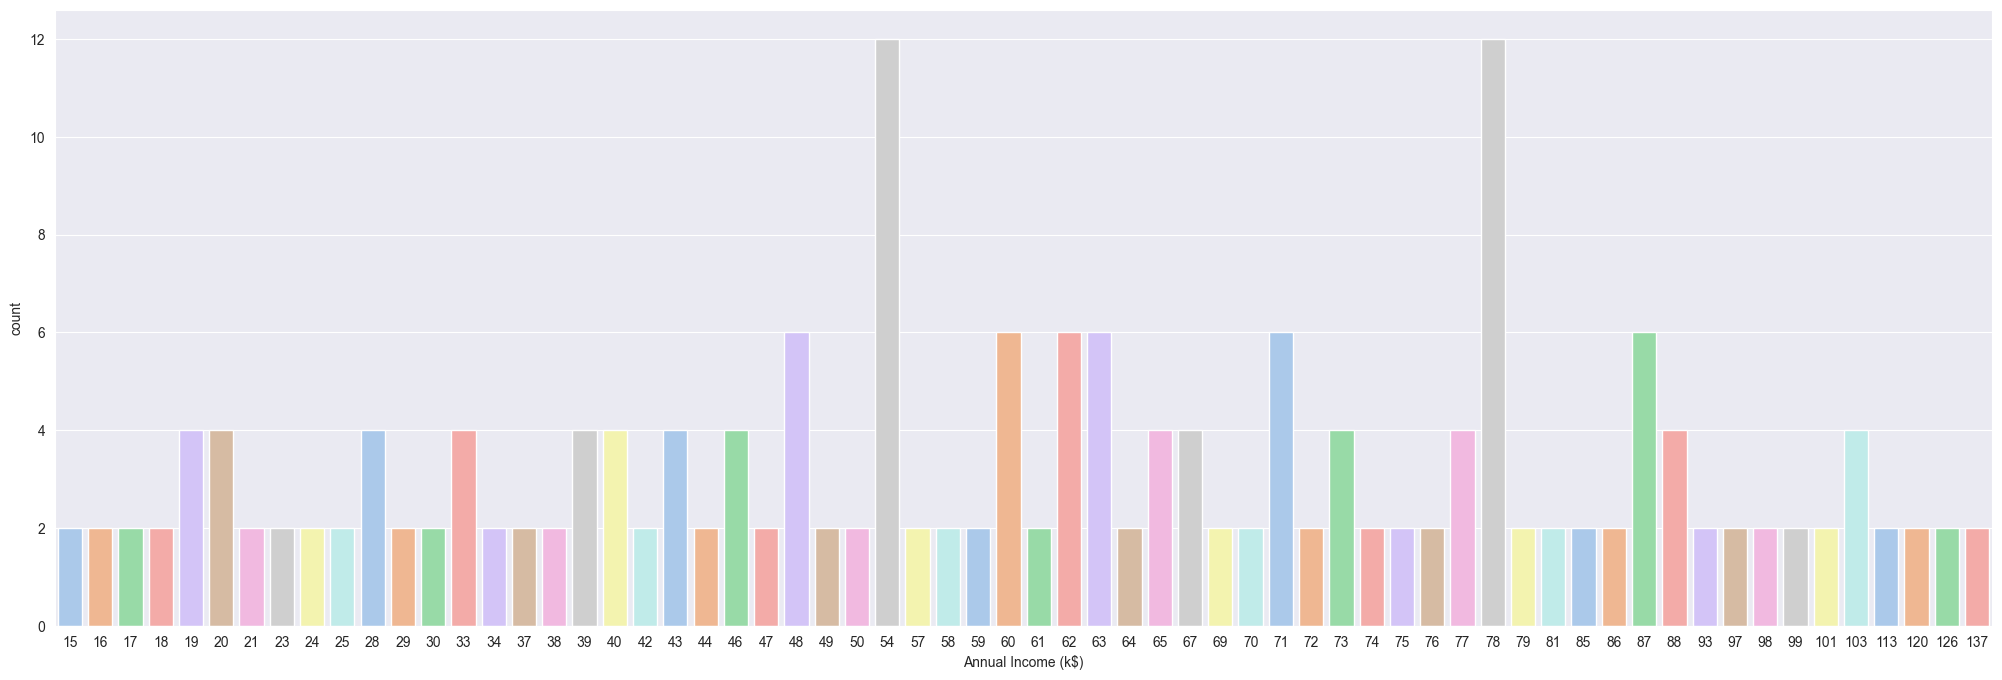

In [48]:
plt.figure(figsize=(25, 8))
sns.countplot(x="Annual Income (k$)", data=df, palette="pastel")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8972\3756815751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Spending Score (1-100)", data=df, palette="pastel")


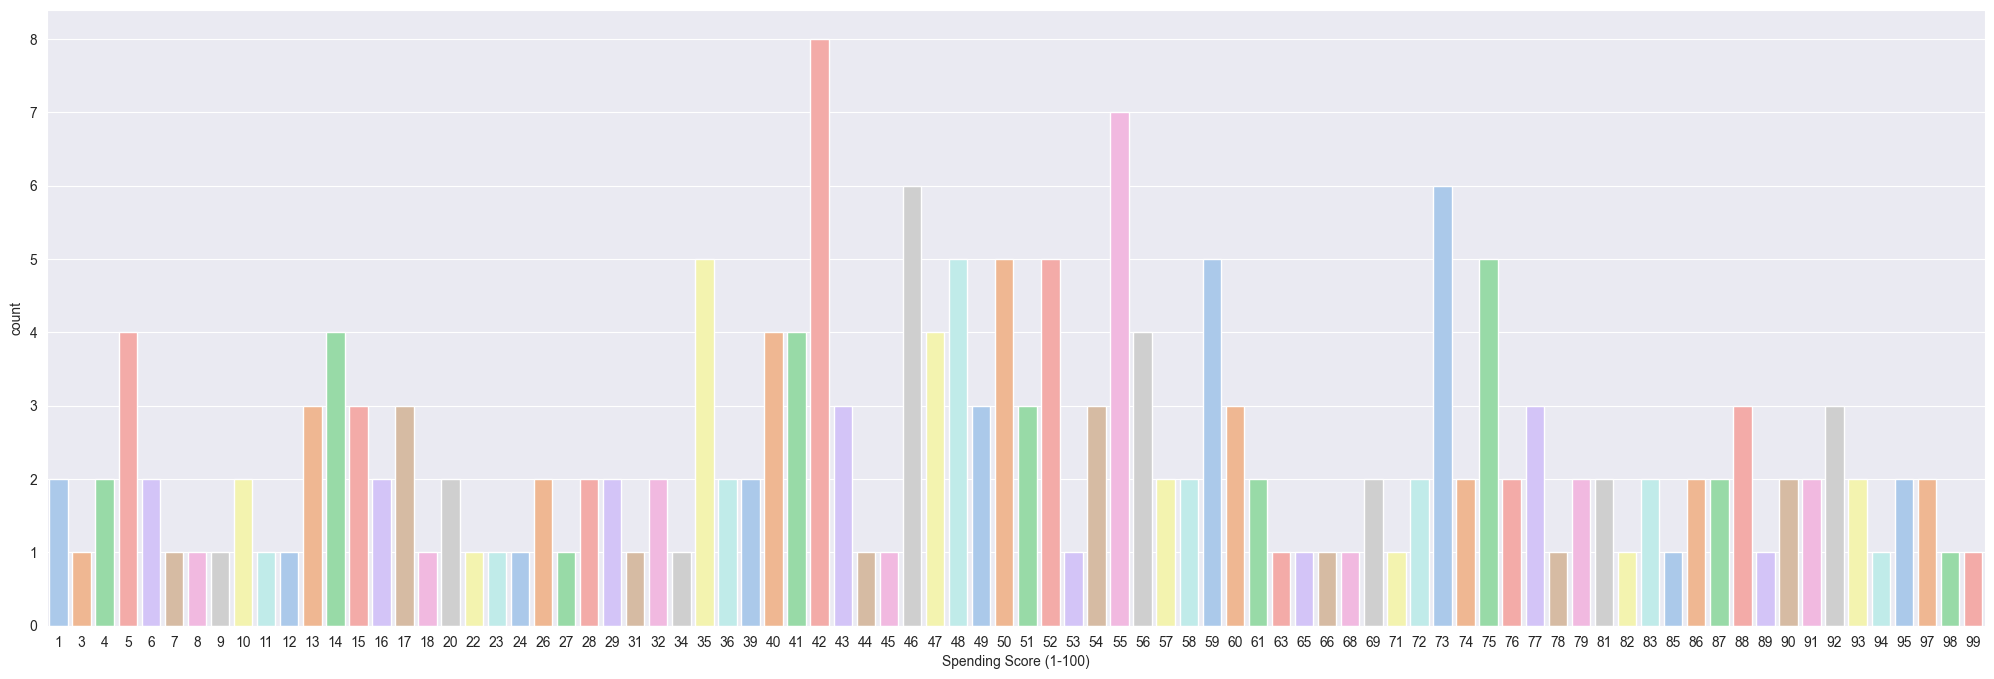

In [49]:
plt.figure(figsize=(25, 8))
sns.countplot(x="Spending Score (1-100)", data=df, palette="pastel")
plt.show()

In [50]:
df.drop(['Gender'], inplace=True, axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Transformed
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


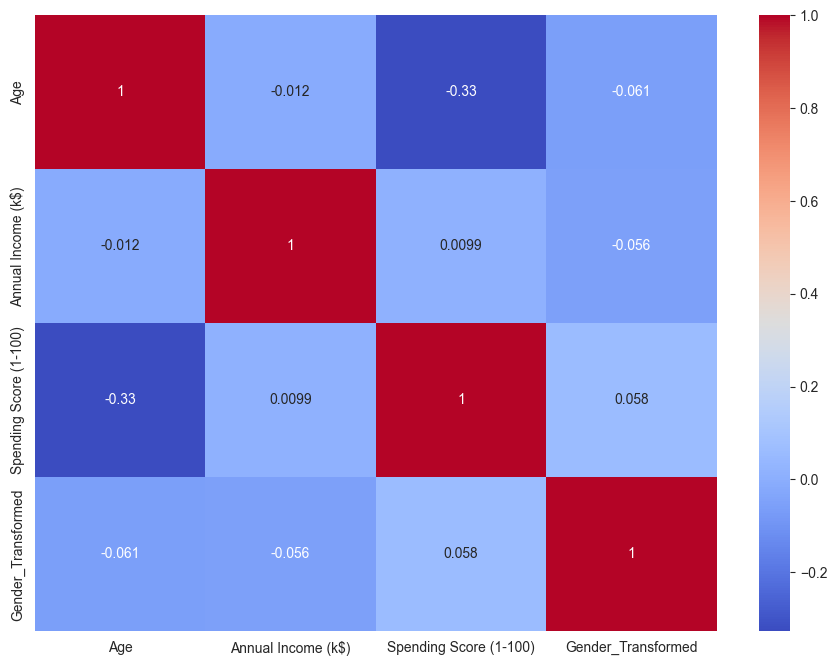

In [51]:
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

**Gaussian Mixture Modeling**

In [52]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Transformed']
X = df[features]

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
gm = GaussianMixture(n_components=2, n_init=10, max_iter=100)
gm.fit(X_scaled)

GaussianMixture(n_components=2, n_init=10)

In [55]:
gm.means_  # Где находятся центры кластеров

array([[-0.05395317, -0.05000195,  0.05150789,  0.88640526],
       [ 0.06866767,  0.06363885, -0.0655555 , -1.12815215]])

In [56]:
gm.converged_  # Сходился ли алгоритм?

True

In [57]:
gm.n_iter_  # Сколько итераций он выполнил?

2

In [58]:
gm.predict(X_scaled)

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [59]:
gm.weights_  # Веса соответствующих гауссовых значений

array([0.56, 0.44])

In [60]:
labels = gm.predict(X_scaled)
df['Cluster'] = labels

In [61]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Transformed,Cluster
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


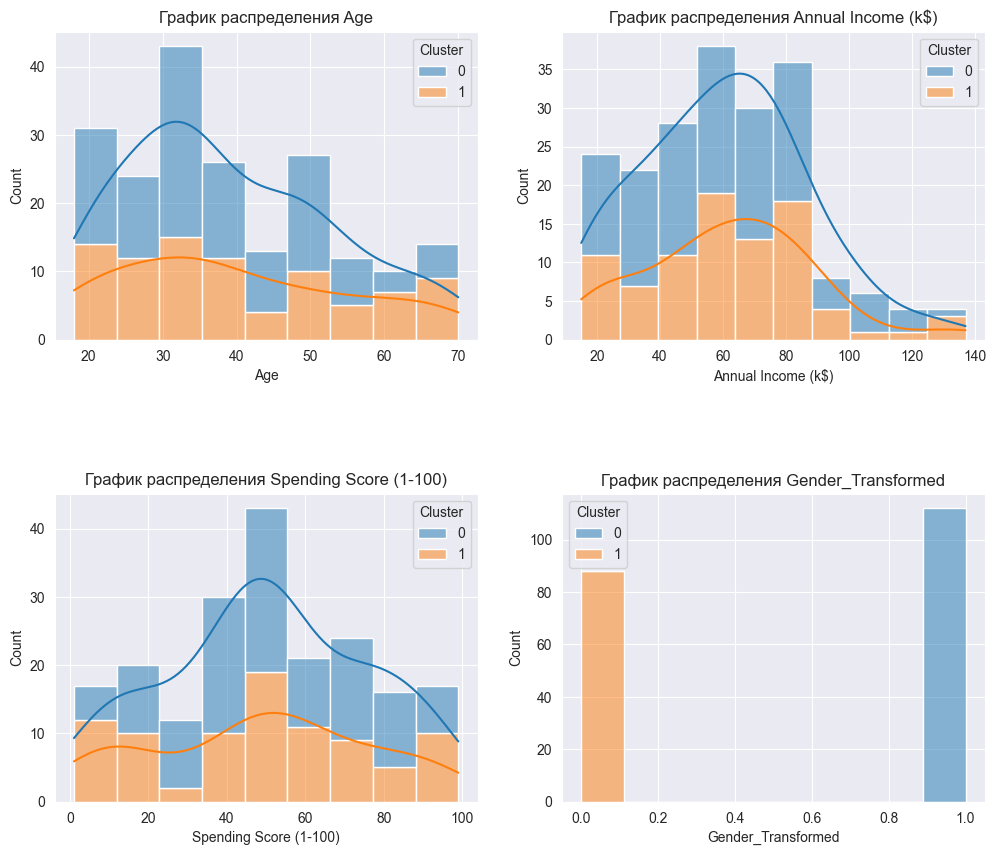

In [62]:
features_to_visualize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Transformed', 'Cluster']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features_to_visualize[:-1]):
    row, col = divmod(i, 2)
    sns.histplot(data=df, x=feature, hue='Cluster', multiple='stack', kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'График распределения {feature}')
plt.show()